# Monte Carlo fit for apollinaire

This notebook is designed to generate a pair of modes that will be fitted by apollinaire in order to assess that the method does not introduce systematics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import apollinaire as apn
from apollinaire.peakbagging import *

Selecting the profile we are going to use:

In [2]:
profile = 'monte_carlo_3'
ndays = 365

## Step 1: generating the spectrum to fit

Defining the frequency vector and the mock background

In [3]:
dt = 60
nyquist = 1/(2*dt)
freq = np.linspace (0, nyquist, 1440*ndays//2)
freq = freq*1e6
back = np.ones (freq.size)

In [4]:
a2z_file = profile + '.a2z'
a2z = read_a2z (a2z_file)
pkb = a2z_to_pkb (a2z)

Example of synthetic spectrum that will be fitted:

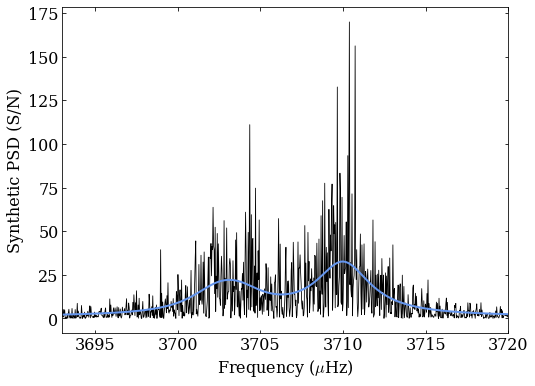

In [5]:
noise_free, entropy = apn.simulate.create_synthetic_psd (freq, pkb, back=back,
                                                         noise_free=True)
psd, entropy = apn.simulate.create_synthetic_psd (freq, pkb, back=back,
                                                  entropy=127138838169534406638366956769226291439)

fig, ax = plt.subplots (figsize=(8,6))
ax.plot (freq, psd, color='black')
ax.plot (freq, noise_free, color='cornflowerblue', lw=2)
ax.set_xlabel (r'Frequency ($\mu$Hz)')
ax.set_ylabel (r'Synthetic PSD (S/N)')

ax.set_xlim (np.amin (pkb[:,2]) - 10, np.amax (pkb[:,2]) + 10)

plt.savefig ('figures/mode_example.pdf')

### Fitting the Monte Carlo spectra

In [6]:
def monte_carlo_run (profile='monte_carlo_1', nrun=1, nwalkers=500,
                     nsteps=500, discard=100, ndays=365, instr='geometric') :
    
    outDir = profile + '_' + str (ndays) + 'days'
    if not path.exists (outDir) :
        os.mkdir (outDir)
    file_entropy = path.join (outDir, 'entropy.log')
    existing_pkb = glob.glob (path.join (outDir, '*.pkb'))
    n_existing = len (existing_pkb)
    
    print ('Found {:.0f} existing runs'.format (n_existing))
    
    if profile=='monte_carlo_2' :
        fit_02, fit_13 = False, True
    else :
        fit_02, fit_13 = True, False
        
    freq = np.linspace (0, nyquist, 1440*ndays)
    freq = freq*1e6
    back = np.ones (freq.size)
    
    for n in range (n_existing, nrun+n_existing) :
        filename_pkb = path.join (outDir, 'summary_run_{}.pkb'.format(str(n).zfill(3))) 
        psd, entropy = apn.simulate.create_synthetic_psd (freq, pkb, back=back, instr=instr)
        a2z_fitted, pkb_fitted = apn.peakbagging.peakbagging (
                            a2z_file, freq, psd, back=back, wdw=None, 
                            dnu=135, spectro=True, nsteps_mcmc=nsteps, 
                            show_corner=False, store_chains=False, mcmcDir='.', 
                            order_to_fit=None, parallelise=True, progress=True, 
                            strategy='pair', fit_02=fit_02, fit_13=fit_13, nwalkers=nwalkers, 
                            normalise=False, instr=instr, show_summary=False, 
                            filename_summary=None, show_prior=False, discard=discard, 
                            use_sinc=False, asym_profile='nigam-kosovichev', restrict=True, 
                            remove_asymmetry_outside_window=True, do_not_use_dnu=False, 
                            save_only_after_sampling=False, size_window=None, fit_amp=False, 
                            extended=True, projected_splittings=False, bins=10, existing_chains='read', 
                            fit_splittings=True, fit_angle=True, fit_amplitude_ratio=False
                            )
        f = open (file_entropy, 'a+')
        f.write (str (entropy) + '\n')
        f.close ()
        save_pkb(filename_pkb, pkb_fitted, author='SNB', spectro=True, extended=True, 
                 fmt=None, projected_splittings=False, nwalkers=nwalkers, 
                 nsteps=nsteps, discard=discard, fit_amp=False)

In [7]:
monte_carlo_run (profile=profile, nrun=67, nsteps=500, ndays=ndays)

Found 133 existing runs
Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:12<00:00,  3.78it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:10<00:00,  3.82it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:12<00:00,  3.78it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:14<00:00,  3.71it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:22<00:00,  3.50it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:26<00:00,  3.40it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:30<00:00,  3.31it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:29<00:00,  3.35it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:29<00:00,  3.35it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:29<00:00,  3.34it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:30<00:00,  3.33it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:28<00:00,  3.36it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:26<00:00,  3.41it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:26<00:00,  3.42it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:24<00:00,  3.45it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:23<00:00,  3.48it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:24<00:00,  3.47it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:22<00:00,  3.50it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:23<00:00,  3.48it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:24<00:00,  3.47it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:21<00:00,  3.54it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:21<00:00,  3.54it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:20<00:00,  3.56it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:20<00:00,  3.56it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:21<00:00,  3.52it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:20<00:00,  3.55it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:20<00:00,  3.55it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:21<00:00,  3.54it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:21<00:00,  3.54it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:21<00:00,  3.52it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:20<00:00,  3.57it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:23<00:00,  3.49it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:19<00:00,  3.57it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:20<00:00,  3.57it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:21<00:00,  3.53it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:20<00:00,  3.57it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:20<00:00,  3.56it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:20<00:00,  3.56it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:21<00:00,  3.53it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:20<00:00,  3.55it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:20<00:00,  3.56it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:20<00:00,  3.55it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:20<00:00,  3.57it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:23<00:00,  3.48it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:20<00:00,  3.55it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:21<00:00,  3.54it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:20<00:00,  3.55it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:19<00:00,  3.58it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:21<00:00,  3.53it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:21<00:00,  3.54it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:20<00:00,  3.57it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:21<00:00,  3.54it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:20<00:00,  3.55it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:21<00:00,  3.54it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:19<00:00,  3.57it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:19<00:00,  3.58it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:22<00:00,  3.52it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:22<00:00,  3.52it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:20<00:00,  3.55it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:20<00:00,  3.55it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:20<00:00,  3.57it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:20<00:00,  3.55it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:21<00:00,  3.53it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:20<00:00,  3.55it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:22<00:00,  3.50it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:20<00:00,  3.57it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)


Orders to fit: 26
Fitting on order 26
Fitting degrees 0 and 2
Window width: 75.0 muHz


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:21<00:00,  3.54it/s]


Ensemble sampling achieved


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sbreton/Workspace/apollinaire/apollinaire/peakbagging/fit_tools.py:895: Warning: Echelle diagram could not be computed on summary plot.
  warnings.warn ("Echelle diagram could not be computed on summary plot.", Warning)
